<h1><center>Fall 2022 5710 Machine Learning: Assignment 4</center></h1>

#### SID: 700727681
#### Email: pxm76810@ucmo.edu

## Programming elements:

1. **Linear Regression**
2. **K-Means Clustering** 
3. **Data Analysis**

### 1. Apply **Linear Regression** to the provided dataset using underlying steps.

- **Import** the given “**Salary_Data.csv**”
- **Split** the data in **train_test partitions**, such that **1/3** of the **data is reserved as test subset**.
- **Train** and **predict** the model.
- **Calculate** the **mean_squared error**
- **Visualize** both **train** and **test** data using **scatter plot**.

==> Data Overview 



,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0



==> Linear Regression Model 



LinearRegression()

==> Coefficient 



,Coefficient
YearsExperience,9426.038769



==> Intercept 



,Intercept
YearsExperience,25324.335379



==> Mean Square Error is: 35301898.887134895 




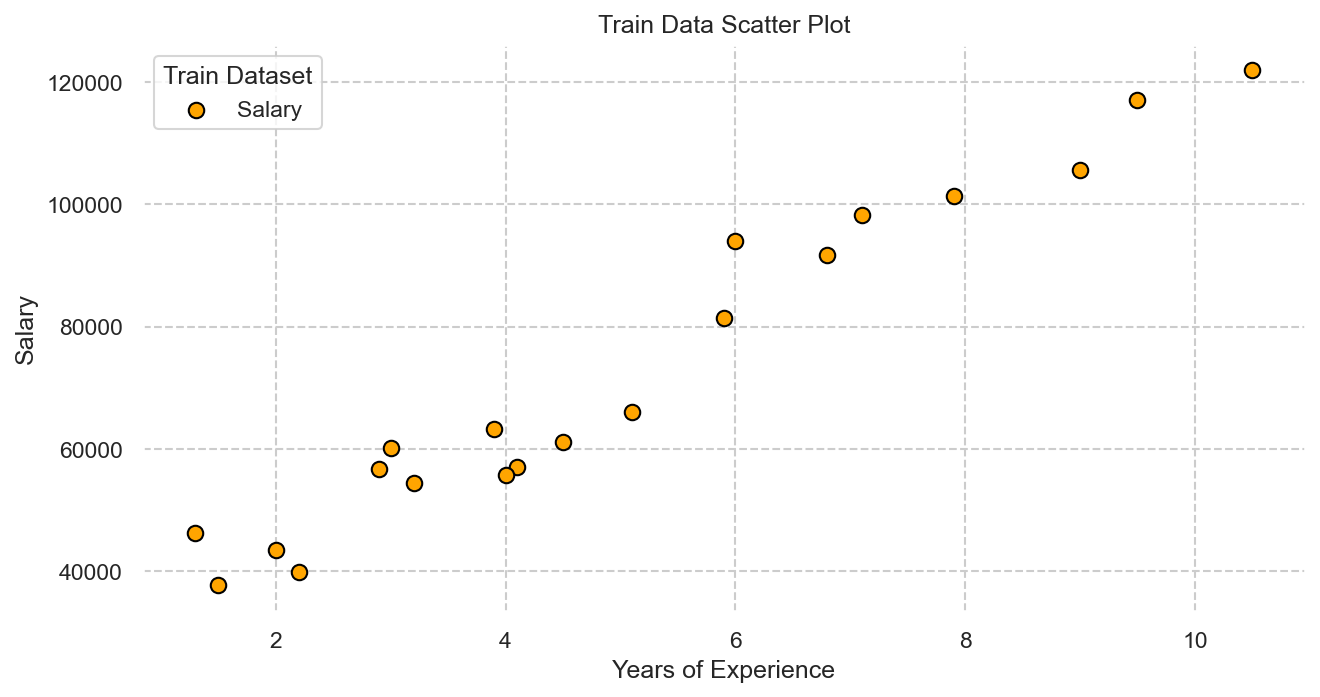

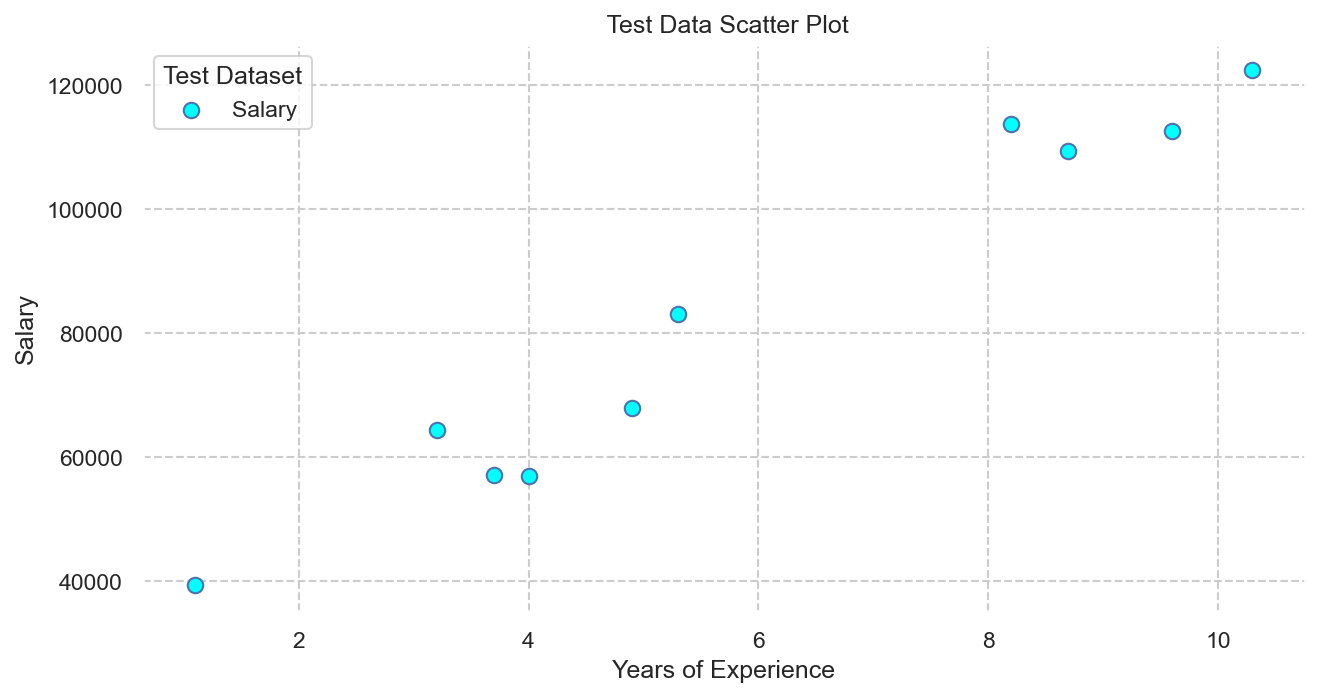

In [1]:
# Import Library

import pandas as pd                                   # Data Preprocessing
from sklearn.linear_model import LinearRegression     # Regression Model
from sklearn.model_selection import train_test_split  # split dataset in training & testing
from sklearn.metrics import mean_squared_error        # calculate the error
import matplotlib.pyplot as plt                       # for plotting graphs
import seaborn as sns                                 # for advance plotting graphs
from sklearn.cluster import KMeans                    # K-Means Model
from sklearn.metrics import silhouette_score          # Geting Optimum number of cluster
from sklearn.preprocessing import StandardScaler      # Feature Scaling

# Graph Styling Parameter
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})

# Read Data
salary = pd.read_csv("Salary_Data.csv")

# Data Glance
print("\033[1m==> Data Overview \n")
display(salary.head())

# Derive Feature and Target Variables
X = salary[["YearsExperience"]] # Feature
y = salary["Salary"] # Target

# Split data into 1/3 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Creation
reg = LinearRegression().fit(X_train,y_train)

print("\033[1m\n==> Linear Regression Model \n")
display(reg)

# Find Coefficient and Intercept for Statical refrence to interpret the model
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
intercept_df = pd.DataFrame(reg.intercept_, X.columns, columns=['Intercept'])

print("\033[1m==> Coefficient \n")
display(coeff_df)

print("\n\033[1m==> Intercept \n")
display(intercept_df)


# Evaluate the model
preds = reg.predict(X_test)
mse = mean_squared_error(y_test,preds)

print("\n\033[1m==> Mean Square Error is:",mse,"\n\n")


# Train and Test Data Visualization
plt.scatter(X_train,y_train, c='orange',ec='black',s=55,label="Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(title="Train Dataset")
plt.title('Train Data Scatter Plot')
plt.show()


plt.scatter(X_test,y_test, c='cyan',ec='b',s=55,label="Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(title="Test Dataset")
plt.title(' Test Data Scatter Plot')
plt.show()

### 2. Apply K means clustering in the dataset provided:

- **Remove** any **null** values by the **mean**.
- Use the **elbow method** to find a **good number of clusters** with the **K-Means** algorithm
- **Calculate** the **silhouette score** for the above clustering

==> Data Overview 



,0,1,2,3,4
CUST_ID,C10001,C10002,C10003,C10004,C10005
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.0,0.636364,1.0
PURCHASES,95.4,0.0,773.17,1499.0,16.0
ONEOFF_PURCHASES,0.0,0.0,773.17,1499.0,16.0
INSTALLMENTS_PURCHASES,95.4,0.0,0.0,0.0,0.0
CASH_ADVANCE,0.0,6442.945483,0.0,205.788017,0.0
PURCHASES_FREQUENCY,0.166667,0.0,1.0,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.0,0.0,0.0,0.0


==> Ckeck Null Values 



CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

==> Columns having Null Values 



['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


==> Genral Stats 



,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


==> Filling and Cross Ckeck Null Values 



CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

==> Silhouette Score 

For n_clusters = 2 => silhouette score is 0.4913766990467015
For n_clusters = 3 => silhouette score is 0.4401958516981847
For n_clusters = 4 => silhouette score is 0.4619436355479136
For n_clusters = 5 => silhouette score is 0.3982390351269862
For n_clusters = 6 => silhouette score is 0.37618807642842295
For n_clusters = 7 => silhouette score is 0.3738522025148794
For n_clusters = 8 => silhouette score is 0.3798576496795975
For n_clusters = 9 => silhouette score is 0.39496677219055365
For n_clusters = 10 => silhouette score is 0.36756513618139425
For n_clusters = 11 => silhouette score is 0.37457606696469103
For n_clusters = 12 => silhouette score is 0.3715651523005781
For n_clusters = 13 => silhouette score is 0.27807658819479875
For n_clusters = 14 => silhouette score is 0.3245477666696373


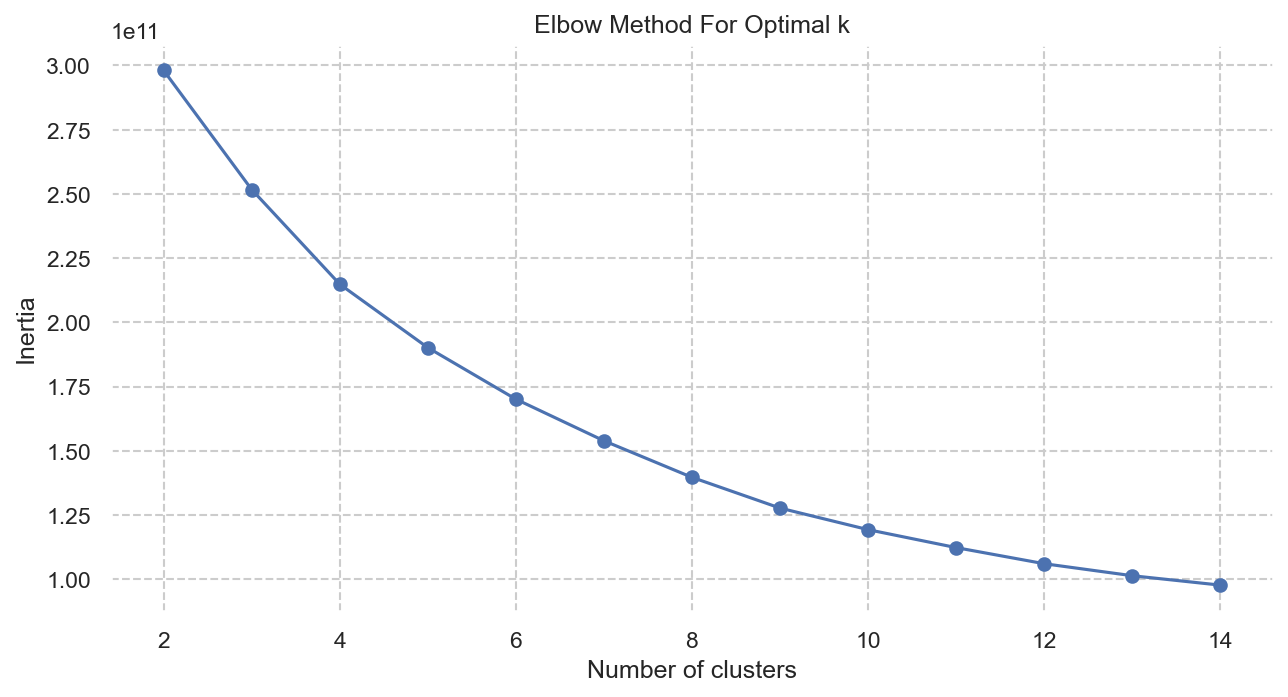

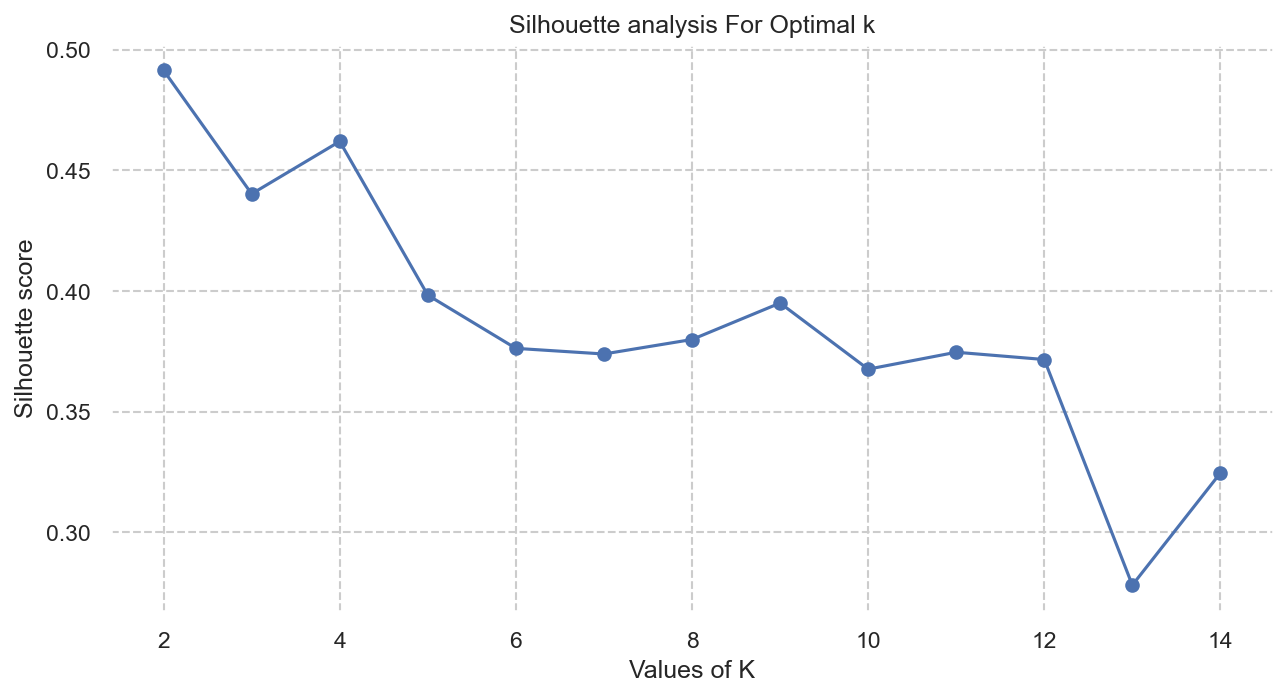

In [2]:

# Read Data
clustering = pd.read_csv("K-Mean_Dataset.csv")

# Data Glance
print("\033[1m==> Data Overview \n")
display(clustering.head().T)

# Check Null
print("\033[1m==> Ckeck Null Values \n")
null_ = clustering.isnull().any()
display(null_)

# Collect Null Columns
print("\033[1m==> Columns having Null Values \n")
null_col = clustering.columns[clustering.isnull().any()].tolist()
display(null_col)

# Get Descriptive Stats
print("\033[1m\n==> Genral Stats \n")
display(clustering.describe().T)

# Fill null values with mean value
clustering =  clustering.fillna(value={'CREDIT_LIMIT':4494.449450,'MINIMUM_PAYMENTS': 8637.0})

# Cross Check null values
print("\033[1m==> Filling and Cross Ckeck Null Values \n")
display(clustering.isnull().any())

# Create Features for K - means Model

FEATURES = clustering[[
     'BALANCE',
     'BALANCE_FREQUENCY',
     'PURCHASES',
     'ONEOFF_PURCHASES',
     'INSTALLMENTS_PURCHASES',
     'CASH_ADVANCE',
     'PURCHASES_FREQUENCY',
     'ONEOFF_PURCHASES_FREQUENCY',
     'PURCHASES_INSTALLMENTS_FREQUENCY',
     'CASH_ADVANCE_FREQUENCY',
     'CASH_ADVANCE_TRX',
     'PURCHASES_TRX',
     'CREDIT_LIMIT',
     'PAYMENTS',
     'MINIMUM_PAYMENTS',
     'PRC_FULL_PAYMENT',
     'TENURE'
]]

# Model Pre Creation

print("\033[1m==> Silhouette Score \n")
# Sum of squared distances
SSE = []
silhouette_avg = []
for cluster in range(2,15):
    # Elbow Method
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    preds = kmeans.fit_predict(FEATURES)
    cluster_labels = kmeans.labels_
    SSE.append(kmeans.inertia_)
    
    # silhouette score
    silhouette_avg.append(silhouette_score(FEATURES, cluster_labels))
    score = silhouette_score(FEATURES, preds)
    print("\033[1mFor\033[0m n_clusters = \033[1m{}\033[0m => \033[1msilhouette score\033[0m is \033[1m{}\033[0m".format(cluster, score))
    

# Plot Elbow Methid
frame = pd.DataFrame({'Cluster':range(2,15), 'SSE':SSE})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.title('Elbow Method For Optimal k')
plt.show()


# Plot silhouette score
plt.plot(frame['Cluster'],silhouette_avg,marker='o')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.title('Silhouette analysis For Optimal k')
plt.show()

### 3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score?      

- If Yes, can you **justify why**

In [3]:
print("\033[1m==> Silhouette Score \n")
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(FEATURES)

range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(scaled_data, preds)
    print("\033[1mFor\033[0m n_clusters = \033[1m{}\033[0m => \033[1msilhouette score\033[0m is \033[1m{}\033[0m".format(n_clusters, score))
    


==> Silhouette Score 

For n_clusters = 2 => silhouette score is 0.20678466205739782
For n_clusters = 3 => silhouette score is 0.24344487810324034
For n_clusters = 4 => silhouette score is 0.1952102586779283
For n_clusters = 5 => silhouette score is 0.19008446744607
For n_clusters = 6 => silhouette score is 0.19964936548598602
For n_clusters = 7 => silhouette score is 0.20422526309325975
For n_clusters = 8 => silhouette score is 0.2171965028895695
For n_clusters = 9 => silhouette score is 0.21522339245224864


**Yes** it has **improved the scored** as we are **normalizing** the data and **removing the outliers** aslo it can can be improved further using hyper opt technique and pca to reduce dimension to get more sophisticated predictions.